# End to End Machine Learning Project on Student Outcomes

Problem Statement
- We will explore how a student's performance is affected by attributes like gender, race, parents' level of education, lunch type, and test preparation course.

### Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
print('EDA')

EDA


### Load Data

Data found at https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

In [3]:
students = pd.read_csv('data/StudentsPerformance.csv')

In [4]:
students.head(8)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39


Data Information
- gender
- race_ethnicity
- parental_level_of_education
- lunch:
- test_prep
- math_score
- reading_score
- writing_score

In [5]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Data Preprocessing

In this section, we will preprocess the data by performing the following:
- Check for nulls
- Check for duplicates
- Check for uniqueness
  - Counts of categories
- Check and fix any data types
- Descriptice statistics
- 

### Checking for Nulls

In [6]:
students.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values.

### Check for Duplicates

In [7]:
students.duplicated().sum()

np.int64(0)

### Check for uniqueness

In [8]:
students.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### Counts of categories

In [9]:
students['gender'].unique()

array(['female', 'male'], dtype=object)

In [10]:
students['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [19]:
# iterate over 
count = 0
for columnName, columnData in students.items():
    if count<5:
        print(students[columnName].value_counts(), '\n')
    count+=1

gender
female    518
male      482
Name: count, dtype: int64 

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64 

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64 

lunch
standard        645
free/reduced    355
Name: count, dtype: int64 

test preparation course
none         642
completed    358
Name: count, dtype: int64 



### Check and fix any data types

In [20]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Descriptice Statistics

In [21]:
students.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Findings
- The means are around
- The standard decviation is around
- The IQR ranges for

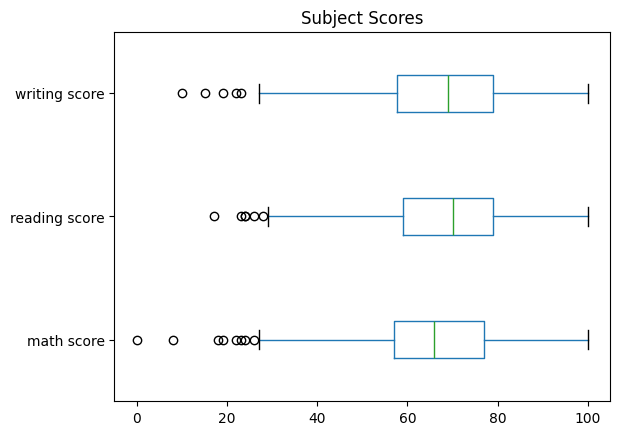

In [38]:
scores = students.iloc[:, 5:]
# scores.head()
scores.boxplot(vert=False, grid=False) #, by='gender')
plt.title('Subject Scores')
plt.show()

In [25]:
# define numerical and categorical columns
# print(students['math score'].dtype)
students['gender'].dtype

dtype('O')

In [42]:
numeric_features = [feature for feature in students.columns if students[feature].dtype != 'O']
print('The {} numerical features : {}'.format(len(numeric_features), numeric_features))

# categorical_features

The 5 numerical features : ['math score', 'reading score', 'writing score', 'total_score', 'average']


### Feature Engineering
Total Score and Average Columns

In [40]:
students['total_score'] = scores.sum(axis=1)
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [41]:
students['average'] = students['total_score']/3
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
